In [ ]:
pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 5.5MB 8.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=9cfcca746781ddbc1f0d4f98aeb109d3bd0eb69cebe8fdb1639a031aa5d487c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-aeu8r1qi/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import pandas_datareader.data as reader
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import numpy as np

In [ ]:
end = dt.date(2021, 3, 1)
start = dt.date(2016, 3, 1)

ticker = ["AAPL", "AMZN", "TSLA", "MELI", "GLOB","^GSPC"]

In [ ]:
stock_prices = reader.get_data_yahoo(ticker, start, end)["Adj Close"]
stock_prices = stock_prices.resample("M").ffill().pct_change()
stock_prices = stock_prices.dropna(axis=0)
stock_prices.head()

stock_prices.to_excel("Stock returns.xlsx")

Symbols,AAPL,AMZN,TSLA,MELI,GLOB,^GSPC
Date,,,,,,
2016-04-30,-0.139921,0.111094,0.047830,0.059737,0.150032,0.002699
2016-05-31,0.071773,0.095817,-0.072811,0.092962,0.131023,0.015325
2016-06-30,-0.042660,-0.009920,-0.049053,0.031769,-0.019681,0.000911
2016-07-31,0.090062,0.060353,0.106039,0.088221,0.072173,0.035610
2016-08-31,0.023652,0.013640,-0.097023,0.123596,-0.074425,-0.001219


In [ ]:
treasury_rate = pd.read_excel("/content/DTB1YR.xls")
treasury_rate = treasury_rate.drop([0],axis=0)
treasury_rate = treasury_rate.set_index("Date")
treasury_rate["DTB1YR"] = treasury_rate["DTB1YR"]/100
treasury_rate.head()

treasury_rate.to_excel("Risk free rate.xlsx")

,DTB1YR
Date,
2016-04-01,0.0055
2016-05-01,0.0066
2016-06-01,0.0044
2016-07-01,0.0049
2016-08-01,0.0059


In [ ]:
df = pd.read_excel("/Dataframe.xlsx")
df = df.set_index("Date")
df.head()

,AAPL,AMZN,TSLA,MELI,GLOB,^GSPC,Rf,AAPL-Rf,AMZN-Rf,TSLA-Rf,MELI-Rf,GLOB-Rf,^GSPC-Rf
Date,,,,,,,,,,,,,
2016-04-30,-0.139921,0.111094,0.047830,0.059737,0.150032,0.002699,0.0055,-0.145421,0.105594,0.042330,0.054237,0.144532,-0.002801
2016-05-31,0.071773,0.095817,-0.072811,0.092962,0.131023,0.015325,0.0066,0.065173,0.089217,-0.079411,0.086362,0.124423,0.008725
2016-06-30,-0.042660,-0.009920,-0.049053,0.031769,-0.019681,0.000911,0.0044,-0.047060,-0.014320,-0.053453,0.027369,-0.024081,-0.003489
2016-07-31,0.090062,0.060353,0.106039,0.088221,0.072173,0.035610,0.0049,0.085162,0.055453,0.101139,0.083321,0.067273,0.030710
2016-08-31,0.023652,0.013640,-0.097023,0.123596,-0.074425,-0.001219,0.0059,0.017752,0.007740,-0.102923,0.117696,-0.080325,-0.007119


In [ ]:
def OLS(x,y):
    X = df[x]
    y = df[y]
    X1 = sm.add_constant(X)
    model = sm.OLS(y, X1)
    results = model.fit()
    print(results.summary()) 
    sns.regplot(x = x, y = y , data=df)

Regresión de AAPL :
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     35.07
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.83e-07
Time:                        02:14:20   Log-Likelihood:                 76.519
No. Observations:                  60   AIC:                            -149.0
Df Residuals:                      58   BIC:                            -144.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0166      0.009

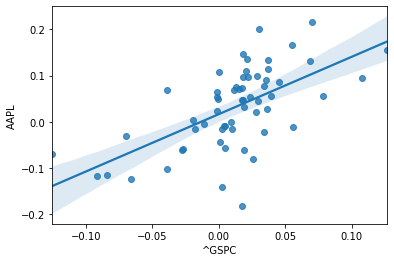

Regresión de AMZN :
                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     34.64
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           2.10e-07
Time:                        02:14:20   Log-Likelihood:                 81.216
No. Observations:                  60   AIC:                            -158.4
Df Residuals:                      58   BIC:                            -154.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0180      0.009

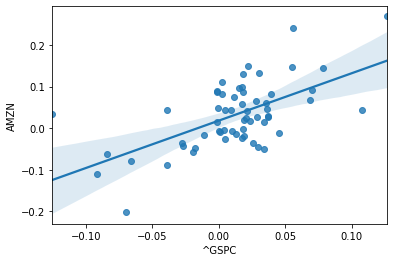

Regresión de TSLA :
                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     15.31
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           0.000242
Time:                        02:14:20   Log-Likelihood:                 21.562
No. Observations:                  60   AIC:                            -39.12
Df Residuals:                      58   BIC:                            -34.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0385      0.023

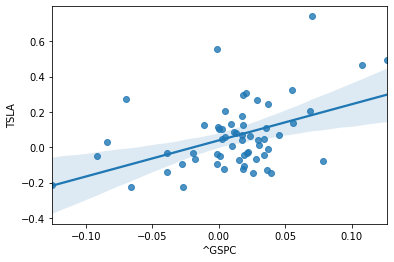

Regresión de MELI :
                            OLS Regression Results                            
Dep. Variable:                   MELI   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     22.78
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.27e-05
Time:                        02:14:20   Log-Likelihood:                 50.626
No. Observations:                  60   AIC:                            -97.25
Df Residuals:                      58   BIC:                            -93.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0349      0.014

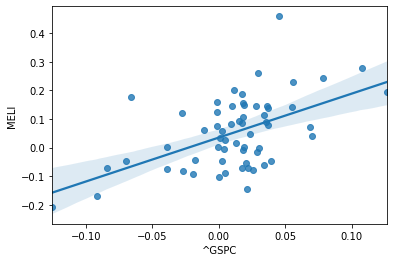

Regresión de GLOB :
                            OLS Regression Results                            
Dep. Variable:                   GLOB   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     18.94
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           5.53e-05
Time:                        02:14:21   Log-Likelihood:                 57.691
No. Observations:                  60   AIC:                            -111.4
Df Residuals:                      58   BIC:                            -107.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0254      0.013

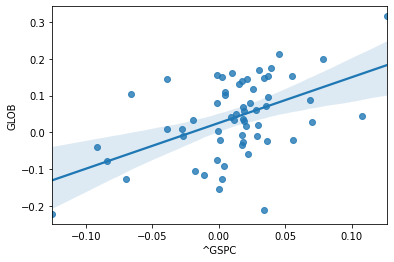

In [ ]:
#Betas sin considerar tasa libre de riesgo:

y = ["AAPL", "AMZN", "TSLA", "MELI", "GLOB"]

for i in y:
  print("Regresión de",i,":")
  OLS("^GSPC",i)
  plt.show()

Regresión de AAPL-Rf :
                            OLS Regression Results                            
Dep. Variable:                AAPL-Rf   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     38.67
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           5.94e-08
Time:                        02:14:41   Log-Likelihood:                 76.614
No. Observations:                  60   AIC:                            -149.2
Df Residuals:                      58   BIC:                            -145.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0196      0.

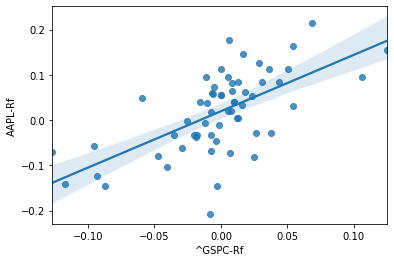

Regresión de AMZN-Rf :
                            OLS Regression Results                            
Dep. Variable:                AMZN-Rf   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     37.86
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           7.61e-08
Time:                        02:14:41   Log-Likelihood:                 81.245
No. Observations:                  60   AIC:                            -158.5
Df Residuals:                      58   BIC:                            -154.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0197      0.

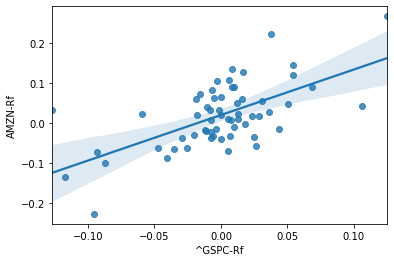

Regresión de TSLA-Rf :
                            OLS Regression Results                            
Dep. Variable:                TSLA-Rf   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     18.78
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           5.90e-05
Time:                        02:14:41   Log-Likelihood:                 22.213
No. Observations:                  60   AIC:                            -40.43
Df Residuals:                      58   BIC:                            -36.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0516      0.

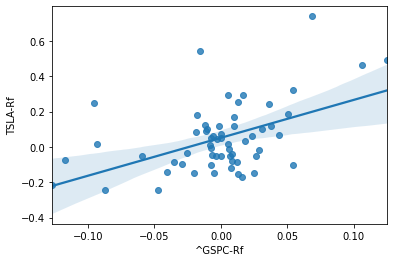

Regresión de MELI-Rf :
                            OLS Regression Results                            
Dep. Variable:                MELI-Rf   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     25.06
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           5.50e-06
Time:                        02:14:41   Log-Likelihood:                 50.775
No. Observations:                  60   AIC:                            -97.55
Df Residuals:                      58   BIC:                            -93.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0416      0.

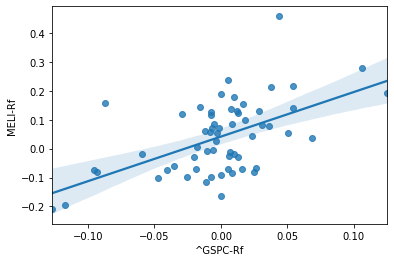

Regresión de GLOB-Rf :
                            OLS Regression Results                            
Dep. Variable:                GLOB-Rf   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     19.49
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           4.46e-05
Time:                        02:14:42   Log-Likelihood:                 57.619
No. Observations:                  60   AIC:                            -111.2
Df Residuals:                      58   BIC:                            -107.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0284      0.

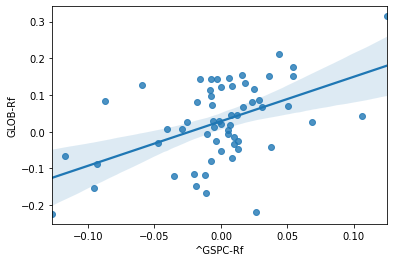

In [ ]:
#Betas considerando tasa libre de riesgo:

y = ["AAPL-Rf", "AMZN-Rf", "TSLA-Rf", "MELI-Rf", "GLOB-Rf"]

for i in y:
  print("Regresión de",i,":")
  OLS("^GSPC-Rf",i)
  plt.show()